In [1]:
import pandas as pd

In [2]:
diabetes=pd.read_csv('/Users/Rahul/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
columns_to_normalize=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
# Normalization=(x-u)/standard_deviation or max-min
diabetes[columns_to_normalize]=diabetes[columns_to_normalize].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
import tensorflow as tf

In [10]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [30]:
num_preg=tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc=tf.feature_column.numeric_column('Glucose_concentration')
dias_press=tf.feature_column.numeric_column('Blood_pressure')
tricep =tf.feature_column.numeric_column('Triceps')
insulin=tf.feature_column.numeric_column('Insulin')
bmi=tf.feature_column.numeric_column('BMI')
diabetes_pedigree=tf.feature_column.numeric_column('Pedigree')
age=tf.feature_column.numeric_column('Age')

In [14]:
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [15]:
# assigned_group=tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=5)

In [16]:
import matplotlib.pyplot as plt

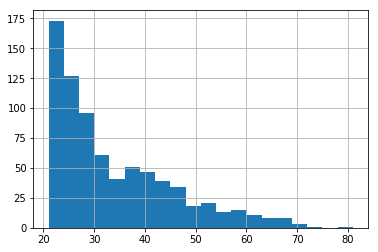

In [18]:
diabetes['Age'].hist(bins=20)

In [32]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [33]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_buckets]

In [34]:
# Train Test Split

In [35]:
x_data=diabetes.drop('Class',axis=1)

In [36]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [37]:
labels=diabetes['Class']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels, test_size=0.33, random_state=42)

In [72]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                               batch_size=10,num_epochs=1000,
                                              shuffle=True)

In [42]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rahul\\AppData\\Local\\Temp\\tmpe9tbldrj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024A5E4E5DD8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [45]:
model.train(input_fn=input_func,steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpe9tbldrj\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 200 into C:\Users\Rahul\AppData\Local\Temp\tmpe9tbldrj\model.ckpt.
INFO:tensorflow:loss = 5.8518896, step = 201
INFO:tensorflow:Saving checkpoints for 300 into C:\Users\Rahul\AppData\Local\Temp\tmpe9tbldrj\model.ckpt.
INFO:tensorflow:Loss for final step: 4.980179.


In [73]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                  batch_size=10,
                                                  num_epochs=1,
                                                  shuffle=False)

In [50]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-29-10:43:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpe9tbldrj\model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-29-10:43:53
INFO:tensorflow:Saving dict for global step 300: accuracy = 0.70472443, accuracy_baseline = 0.66141737, auc = 0.74653935, auc_precision_recall = 0.54039717, average_loss = 0.5698025, global_step = 300, label/mean = 0.33858266, loss = 5.5665326, precision = 0.6122449, prediction/mean = 0.33067694, recall = 0.3488372
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 300: C:\Users\Rahul\AppData\Local\Temp\tmpe9tbldrj\model.ckpt-300


In [51]:
results

{'accuracy': 0.70472443,
 'accuracy_baseline': 0.66141737,
 'auc': 0.74653935,
 'auc_precision_recall': 0.54039717,
 'average_loss': 0.5698025,
 'label/mean': 0.33858266,
 'loss': 5.5665326,
 'precision': 0.6122449,
 'prediction/mean': 0.33067694,
 'recall': 0.3488372,
 'global_step': 300}

In [52]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                   batch_size=10,
                                                   num_epochs=1,
                                                   shuffle=False)

In [53]:
predictions=model.predict(pred_input_func)

In [56]:
predictions

<generator object Estimator.predict at 0x0000024A5D9947D8>

In [54]:
my_pred=list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpe9tbldrj\model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [57]:
my_pred

[{'logits': array([0.10201943], dtype=float32),
  'logistic': array([0.5254828], dtype=float32),
  'probabilities': array([0.47451726, 0.5254828 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.5908923], dtype=float32),
  'logistic': array([0.1692584], dtype=float32),
  'probabilities': array([0.83074164, 0.1692584 ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.6687484], dtype=float32),
  'logistic': array([0.15859114], dtype=float32),
  'probabilities': array([0.8414089 , 0.15859112], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5386746], dtype=float32),
  'logistic': array([0.36849597], dtype=float32),
  'probabilities': array([0.63150406, 0.36849597], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits'

In [74]:
# Density Neural Network
dnn_model=tf.estimator.DNNClassifier(hidden_units=[30,30,30],feature_columns=feat_cols,
                                    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rahul\\AppData\\Local\\Temp\\tmp307sig_g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024A5FF94A20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [75]:
dnn_model.train(input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Rahul\AppData\Local\Temp\tmp307sig_g\model.ckpt.
INFO:tensorflow:loss = 7.1306534, step = 1
INFO:tensorflow:global_step/sec: 193.684
INFO:tensorflow:loss = 7.1166515, step = 101 (0.532 sec)
INFO:tensorflow:global_step/sec: 318.455
INFO:tensorflow:loss = 5.205148, step = 201 (0.314 sec)
INFO:tensorflow:global_step/sec: 314.165
INFO:tensorflow:loss = 4.5194106, step = 301 (0.301 sec)
INFO:tensorflow:global_step/sec: 302.486
INFO:tensorflow:loss = 5.0168896, step = 401 (0.338 sec)
INFO:tensorflow:global_step/sec: 324.771
INFO:tensorflow:loss = 2.5111382, step = 501 (0.301 sec)
INFO:tensorflow:global_step/sec: 287.982
INFO:tensorflow:loss = 4.088878, step = 601 (0.355 sec)
INFO:tensorflow:global_step/se

In [76]:
#eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,
#      shuffle=False)

In [77]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-29-11:11:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmp307sig_g\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-29-11:11:04
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.78346455, accuracy_baseline = 0.66141737, auc = 0.8151994, auc_precision_recall = 0.6551448, average_loss = 0.5205884, global_step = 1000, label/mean = 0.33858266, loss = 5.0857477, precision = 0.73846155, prediction/mean = 0.2846553, recall = 0.55813956
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Rahul\AppData\Local\Temp\tmp307sig_g\model.ckpt-1000


{'accuracy': 0.78346455,
 'accuracy_baseline': 0.66141737,
 'auc': 0.8151994,
 'auc_precision_recall': 0.6551448,
 'average_loss': 0.5205884,
 'label/mean': 0.33858266,
 'loss': 5.0857477,
 'precision': 0.73846155,
 'prediction/mean': 0.2846553,
 'recall': 0.55813956,
 'global_step': 1000}